## Import Necessary Modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random
import csv
import matplotlib as mpl

## Determine first run of LMC

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


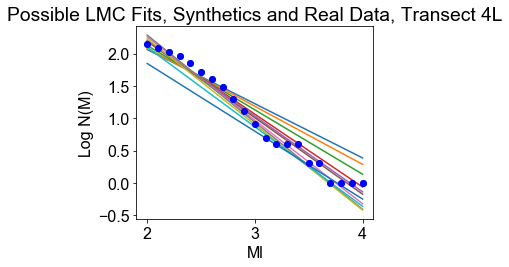

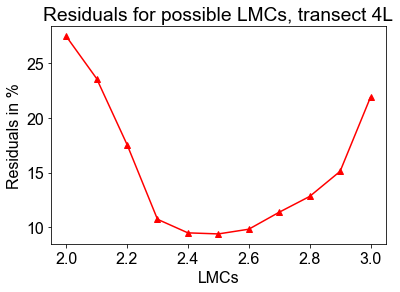

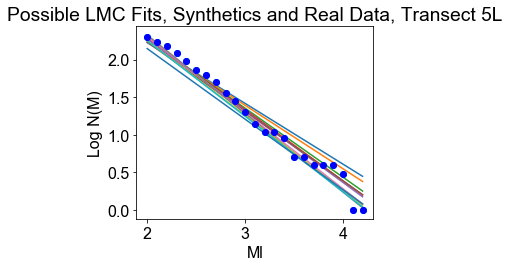

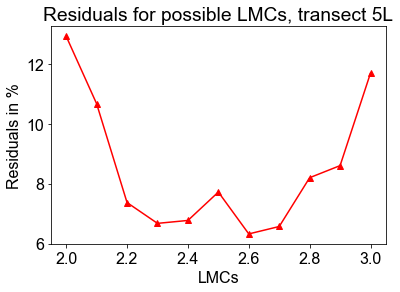

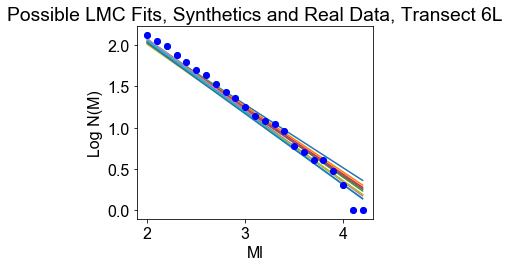

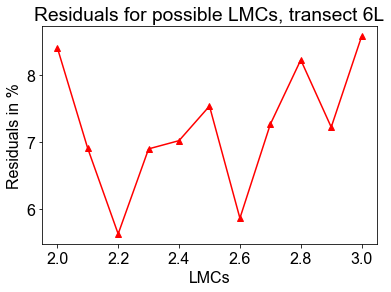

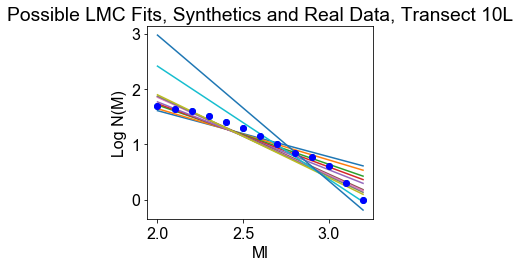

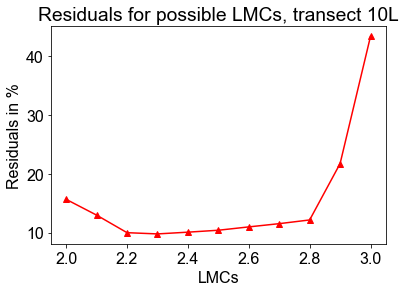

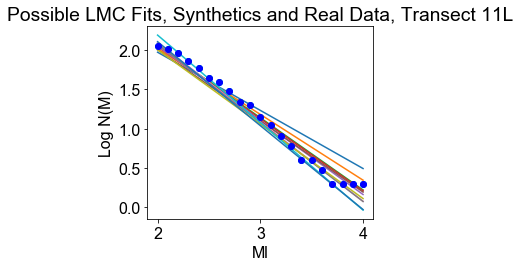

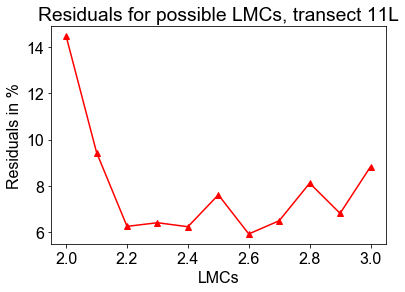

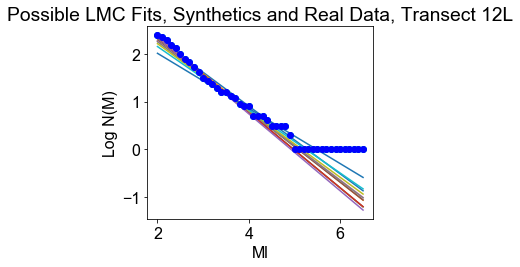

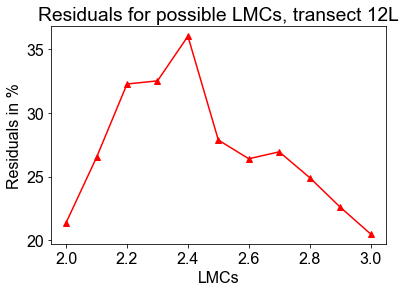

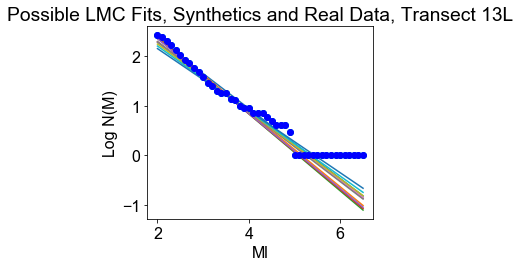

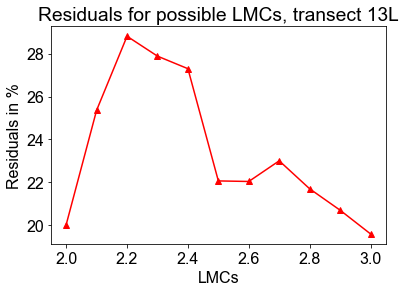

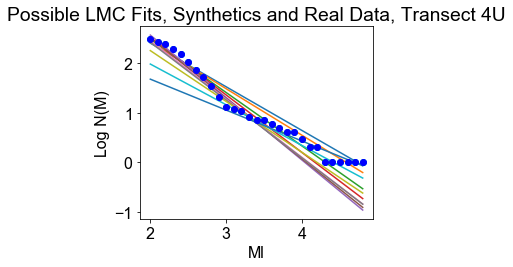

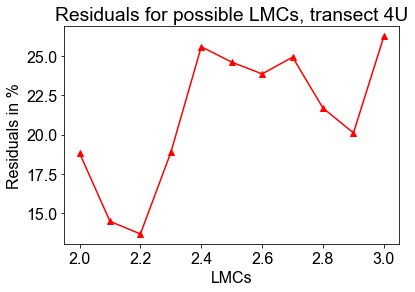

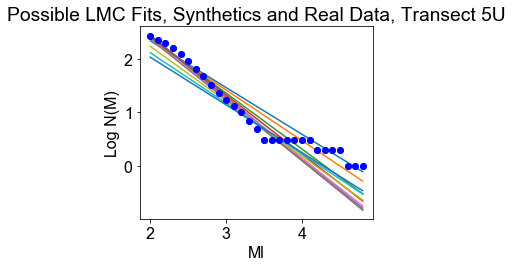

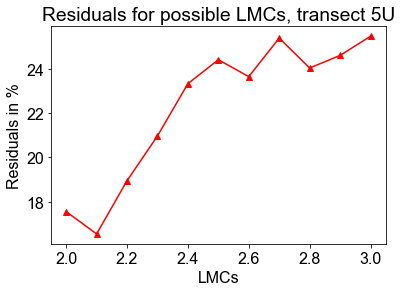

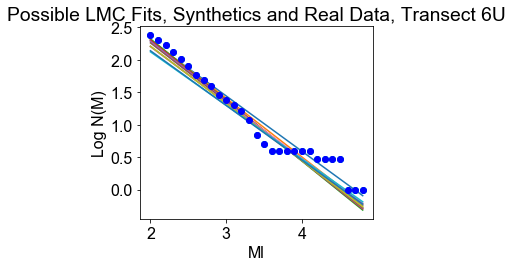

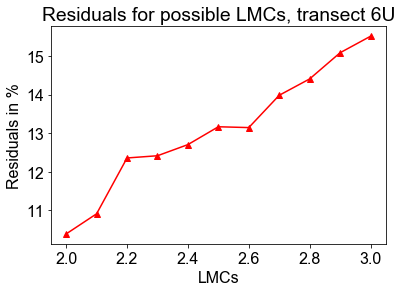

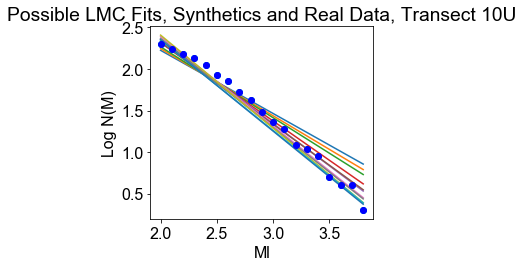

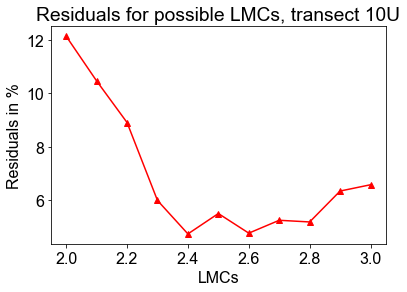

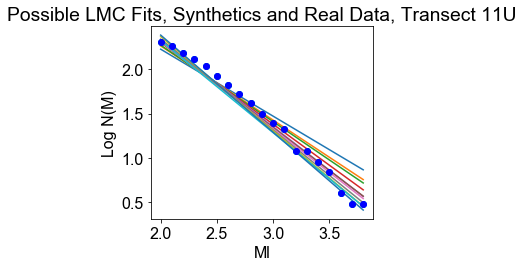

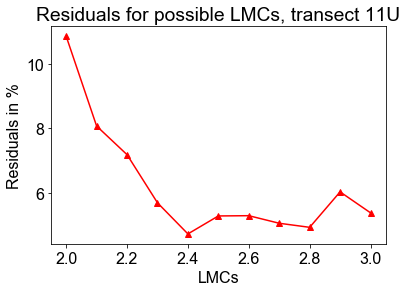

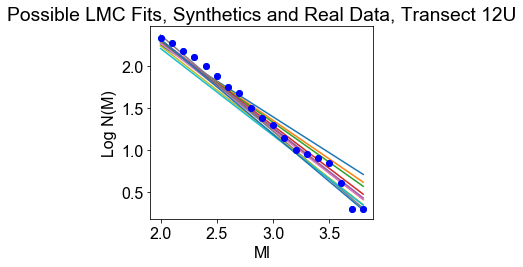

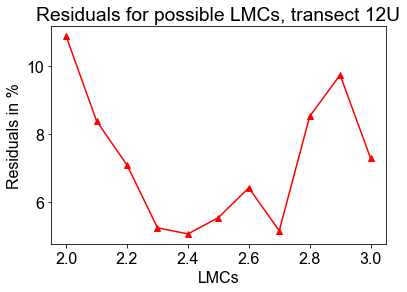

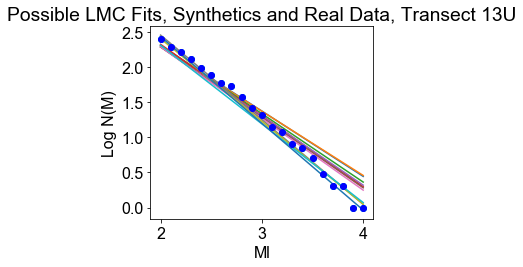

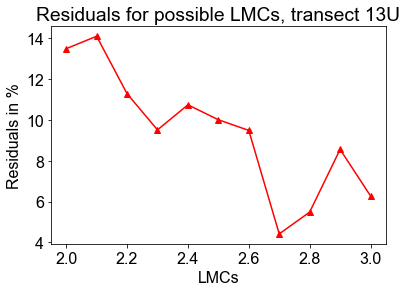

In [4]:
amt, lower_cutoff_magnitude=[],[]

x=1 

file=['associated_4L','associated_5l','associated_6L','associated_10L','associated_11L','associated_12L','associated_13L','associated_4U','associated_5U','associated_6U','associated_10U','associated_11U','associated_12U','associated_13U']
start_years=[2004, 2004, 2005, 2006, 2006, 2006, 2006, 2004, 2004, 2005, 2006, 2006, 2006, 2006]
transect_number=['4L', '5L', '6L','10L','11L','12L','13L','4U','5U','6U','10U','11U','12U','13U']

for i in range(len(file)):
    start=start_years[i]
    transect=transect_number[i]
    #open file and create lists for the info that is needed from the file
    d,depth,m,ml,years=[],[],[],[],[]
    evtfl=open(file[i])
    for line in evtfl:
        d.append(line.split()[2])
        m.append(line.split()[3])
        years.append(line.split()[5])
    
    #keep only the data that is from after the start point given in the list above and only everything deeper than 50 km
    years=[float(i) for i in years]
    for i in range(len(years)):
        if years[i]<start:
            continue
        else:
            depth.append(d[i])
            ml.append(m[i])
            
    depth=[float(i) for i in depth]
    ml=[float(i) for i in ml]
    ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
    depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]
    amt.append(len(depth))
    
    
    #set up a list of values for possible minimum magnitudes
    #we will carry out linear regression on each of these in order to get estimates for what should be the 
    #actual magnitude of completeness
    min_mag=np.arange(2.0,3.1,0.1)
    
    ###########################################################################################################
    ####################################### SET UP HISTOGRAM ##################################################
    ###########################################################################################################
    #*note that Weimer and Wyss use cumulative magnitude for their methods
    binwidth=0.1
    Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
    hist,bin_edges=np.histogram(ml,bins=Nbins)
    bin_edges=bin_edges[:-1]
    cum_y=[sum(hist[i:]) for i in range(len(hist))]
    y=np.log10(cum_y)
    

    aval,b,bval=[],[],[]
    for j in range(len (min_mag)):
        ycut,bin_edgescut=[],[]
        ml_cut=[]
        for i in range (len(y)):
            if bin_edges[i]>=min_mag[j] and bin_edges[i]<5.0:
                ycut.append(y[i])
                bin_edgescut.append(bin_edges[i])
        for i in range (len(ml)):
            if ml[i]>=min_mag[j]:
                ml_cut.append(ml[i])
                
        ################################################################################
        ######################## MAXIMUM LIKELIHOOD ####################################
        ################################################################################
        # ycut= y values for log10(cum_y)
        # bin_edgescut= bin values
        
        mu=sum(ml_cut)/len(ml_cut) 
        m=0.1
        mc=min_mag[j]
        p=1+(m/(mu-mc))
        b_=(1/(math.log(10)*m))*math.log(p)
        bval.append(b_)
        
        a = np.log10(len(ml_cut)) + b_* mc
        aval.append(a)
        
    
        
    #We now have a list of a and b values. One set of a and b for each minimum magnitude possibility.
    #Now, we need to generate synthetic data for each a,b set 
    
    syn_ml=np.arange(2.0, max(ml)+binwidth, binwidth)
    syn_ml=syn_ml[1:]
    synthetics=[]
    for i in range(len(aval)):
        syn_data=bval[i]*-1*syn_ml+aval[i]
        synthetics.append(syn_data)
        
    #this chunk of code creates one list called synthetics which is filled with lists of synthetic data for each 
    #set of a,b 
    
    #NEXT we need to compare this synthetic data with the real data,
    # need to calculte the number of events in each magnitude bin for both sets of data and compare them
    B=y
    residuals=[]
    for i in range(len(synthetics)):
        R=[]
        for j in range(len(synthetics[i])):
            S=synthetics[i]
            r= abs(B[j]-S[j])
            R.append(r)
        resid=((sum(R)/sum(B))*100)
        residuals.append(resid)
    
    plt.figure()
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['font.size']=16
    mpl.rcParams['font.family'] = 'Arial'
    plt.plot(bin_edges,y, 'co')
    plt.plot(bin_edges, synthetics[0])
    plt.plot(bin_edges, synthetics[1])
    plt.plot(bin_edges, synthetics[2])
    plt.plot(bin_edges, synthetics[3])
    plt.plot(bin_edges, synthetics[4])
    plt.plot(bin_edges, synthetics[5])
    plt.plot(bin_edges, synthetics[6])
    plt.plot(bin_edges, synthetics[7])
    plt.plot(bin_edges, synthetics[8])
    plt.plot(bin_edges, synthetics[9])
    plt.plot(bin_edges, synthetics[10])
    plt.plot(bin_edges, y,'bo') 
    plt.title('Possible LMC Fits, Synthetics and Real Data, Transect '+transect)
    plt.ylabel('Log N(M)')
    plt.xlabel('Ml')
    plt.tight_layout()
    plt.savefig('LMC_synthetics_transect'+transect+'_50.jpg')
    plt.savefig('LMC_synthetics_transect'+transect+'_50.pdf')
    
    
    
    plt.figure()
    plt.plot(min_mag, residuals, 'r^')
    plt.plot(min_mag, residuals, 'r-')
    plt.title('Residuals for possible LMCs, transect '+transect)
    plt.xlabel('LMCs')
    plt.ylabel('Residuals in %')
    plt.savefig('LMC_residuals_transect'+transect+'_50.jpg')
    plt.savefig('LMC_residuals_transect'+transect+'_50.pdf')
    
    
        
    for i in range(len(residuals)):
        if residuals[i]<= 10:
            lower_cutoff_magnitude.append(min_mag[i])
            break
            
        elif residuals[i]== min(residuals):
            lower_cutoff_magnitude.append(min_mag[i])
    
    x+=3
    

    

In [5]:
print(lower_cutoff_magnitude)
print(len(lower_cutoff_magnitude))

[2.4000000000000004, 2.2, 2.0, 2.2, 2.1, 3.000000000000001, 3.000000000000001, 2.2, 2.1, 2.0, 2.2, 2.1, 2.1, 2.3000000000000003]
14


## Now determine UMC

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


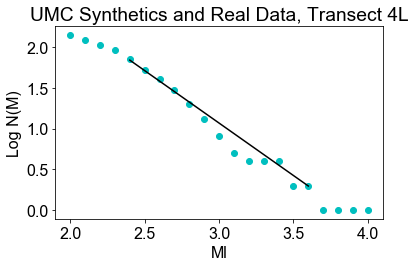

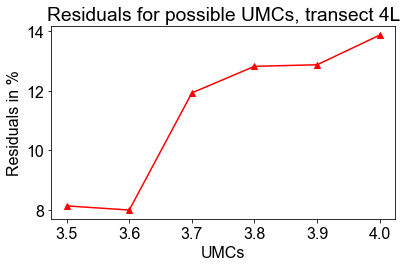

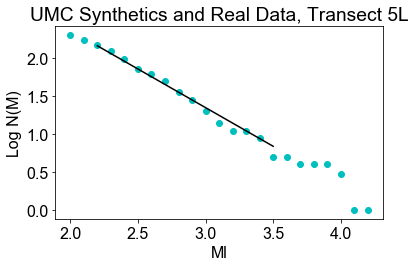

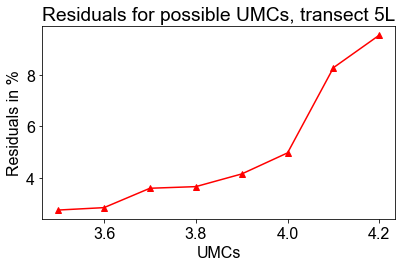

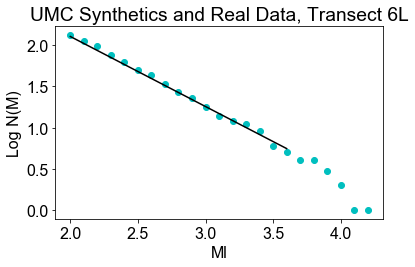

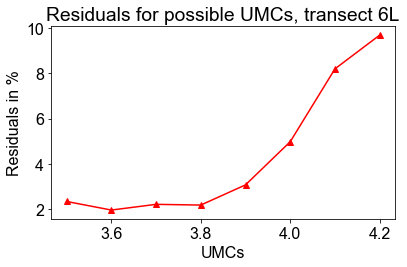

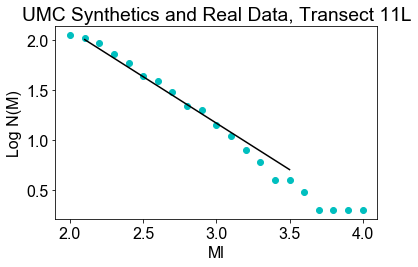

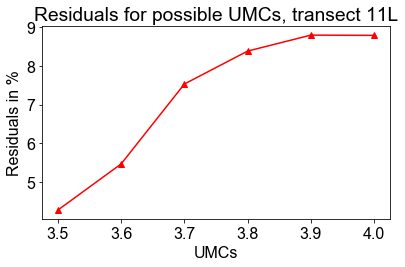

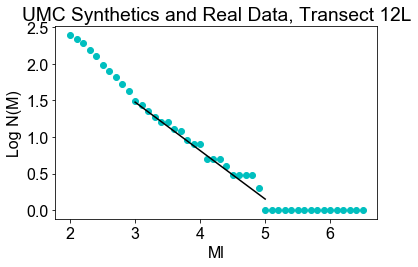

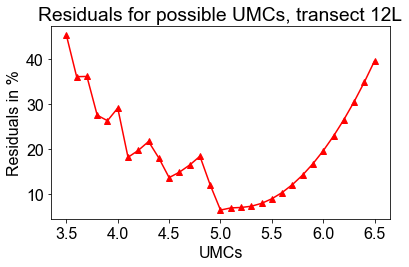

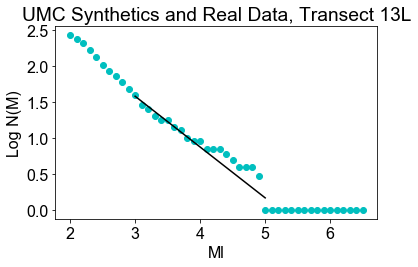

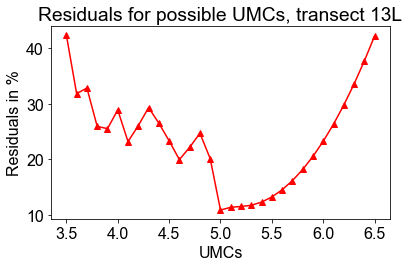

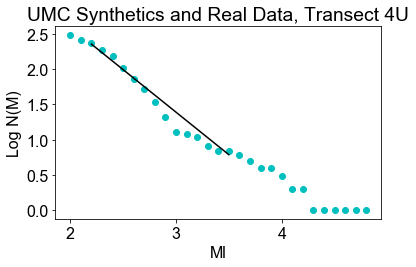

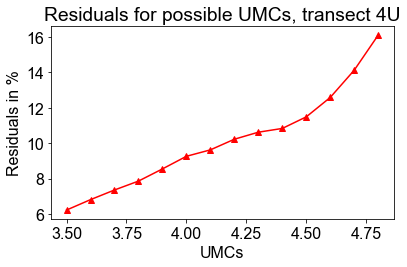

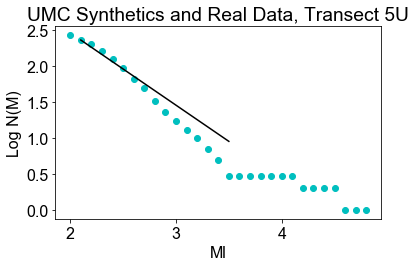

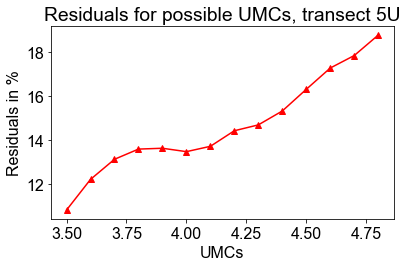

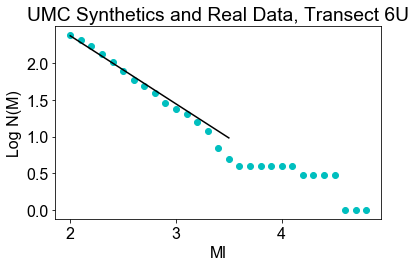

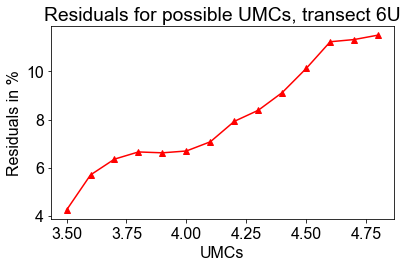

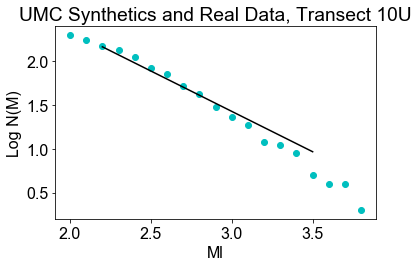

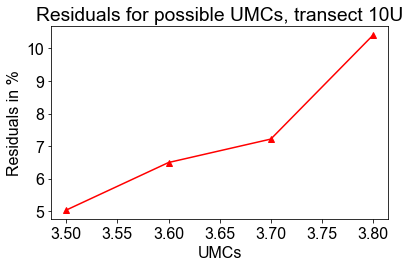

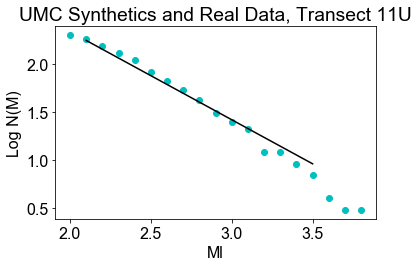

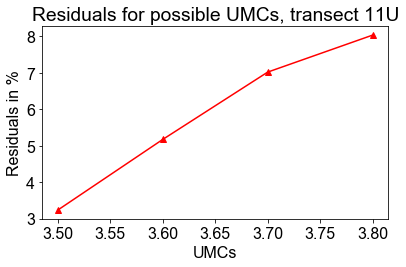

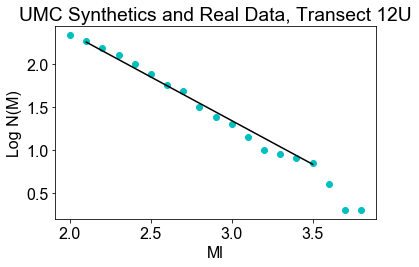

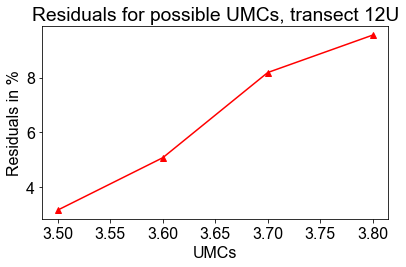

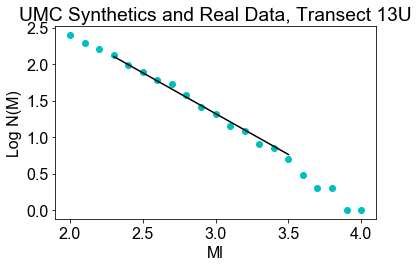

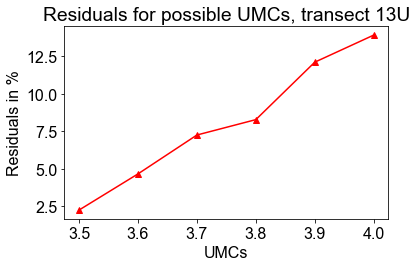

In [6]:
upper_cutoff_magnitude=[]
for i in range(len(file)):
    transect=transect_number[i]
    mc=lower_cutoff_magnitude[i]
    start=start_years[i]
    #open file and create empty lists for the info that is needed
    d,depth,m,ml,years=[],[],[],[],[]
    evtfl=open(file[i])

    #fill the empty lists with data from the associated file
    for line in evtfl:
        d.append(line.split()[2])
        m.append(line.split()[3])
        years.append(line.split()[5])
        
    years=[float(i) for i in years]
    
    #keep only the data that is from after the start point given in the list above
    for i in range(len(years)):
        if years[i]<start:
            continue
        else:
            depth.append(d[i])
            ml.append(m[i])
     
    #change data type from strings to floating point numbers
    depth=[float(i) for i in depth]
    ml=[float(i) for i in ml]
    
    #set up a list of values for possible minimum magnitudes
    #we will carry out linear regression on each of these in order to get estimates for what should be the 
    #actual magnitude of completeness
    max_mag=np.arange(3.5,7.0,0.1)
    
    #keep only the data that is deeper than 50 km
    ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
    depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]

    amt.append(len(depth))
    
    #set up bins for histogram sorting *note that Weimer and Wyss use cumulative magnitude for their methods
    binwidth=0.1
    Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
    #create histogram from real data
    hist,bin_edges=np.histogram(ml,bins=Nbins)
    
    bin_edges=bin_edges[:-1]
        
    #make into a cumulative histogram
    cum_y=[sum(hist[i:]) for i in range(len(hist))]
    #take the log10 of this distribution
    y=np.log10(cum_y)
    
    #now here comes the tricky part, we need to trucate for each minimum magnitude but leaving the high magnitude
    # in tact and then calculate the linear regression coefficients and store them
    aval,b,bval,synthetics, real, bins_=[],[],[],[],[],[]
    syn_ml=np.arange(mc,3.5,0.1)
    cutoffs=[]
    residuals=[]
    r_bins=[]
    for j in range(len (max_mag)):
        ml_cut=[]

        for i in range (len(ml)):
            if ml[i]<=max_mag[j] and ml[i]>=mc:
                ml_cut.append(ml[i])
             
        ################################################################################
        ######################## MAXIMUM LIKELIHOOD ####################################
        ################################################################################
        # ycut= y values for log10(cum_y)
        # bin_edgescut= bin values
        
        mu=sum(ml_cut)/len(ml_cut) #mu
        m=0.1

        p=1+(m/(mu-mc)) #eqn 3.10
        b=(1/(math.log(10)*m))*math.log(p)
        bval.append(b)
        
        a = np.log10(len(ml_cut)) + b* mc
        aval.append(a)
        
        
        ### Only using the following linear regression to generate a values for the synthetic data until I can
        ### figure out how to use maximum likelihood to calculate them
        
        #slope, intercept, r_value, p_value, std_err= stats.linregress(bin_edgescut,ycut)        
        #a.append(intercept)
        #b.append(slope)
        
    #We now have a list of a and b values. One set of a and b for each minimum magnitude possibility.
    #Now, we need to generate synthetic data for each a,b set 

        syn_ml=np.ndarray.tolist(syn_ml)
        
        if max_mag[j] > max(bin_edges):
            break
            
        syn_ml.append(max_mag[j])
        
        
        #syn_ml=syn_ml[1:]
        syn_ml=np.asarray(syn_ml)

        syn_data=b*-1*syn_ml+a
        synthetics.append(syn_data)

        
    #this chunk of code creates one list called synthetics which is filled with lists of synthetic data for each 
    #set of a,b 
    
    #NEXT we need to compare this synthetic data with the real data,
    # need to calculte the number of events in each magnitude bin for both sets of data and compare them
#     B=y
      
        #truncate bin_edges and y to match the data cut off by the rest
        B,bins=[],[]
        
        for i in range(len(bin_edges)):
                
            if bin_edges[i] >= mc and bin_edges[i] <= max_mag[j]+0.01:
                    B.append(y[i])
                    bins.append(round(bin_edges[i],1))
                    
        bins_.append(bins)
        real.append(B)
        R=[]  

        
        r= abs(B-syn_data)
        R.append(r)
        resid=((sum(R)/sum(B))*100)
        residuals.append(sum(resid))
    residuals_bins=np.arange(3.5,max(bin_edges),0.1)

    
    for i in range(len(residuals)):

        if residuals[i]== min(residuals):
            upper_cutoff_magnitude.append(max_mag[i])
            

            plt.figure()
            plt.plot(bin_edges, y,'co')
            plt.plot(bins_[i],synthetics[i],'k-')
            plt.title('UMC Synthetics and Real Data, Transect '+transect)
            plt.ylabel('Log N(M)')
            plt.xlabel('Ml')
            plt.tight_layout()
            plt.savefig('UMC_synthetics_transect'+transect+'_50.jpg')
            plt.savefig('UMC_synthetics_transect'+transect+'_50.pdf')
            plt.figure()
            plt.plot(residuals_bins, residuals,'r')
            plt.plot(residuals_bins, residuals,'r^')
            plt.title('Residuals for possible UMCs, transect '+transect)
            plt.xlabel('UMCs')
            plt.ylabel('Residuals in %')
            plt.tight_layout()
            plt.savefig('UMC_residuals_transect'+transect+'_50.jpg')
            plt.savefig('UMC_residuals_transect'+transect+'_50.pdf')
            
            



## Now find the final LMC

In [7]:
umc=[round(i,1) for i in upper_cutoff_magnitude]
umc.insert(3,3.1)
print(umc)
len(umc)

[3.6, 3.5, 3.6, 3.1, 3.5, 5.0, 5.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]


14

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


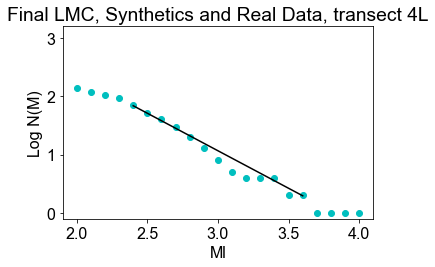

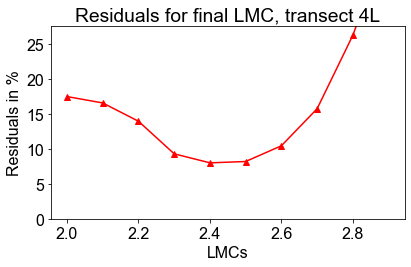

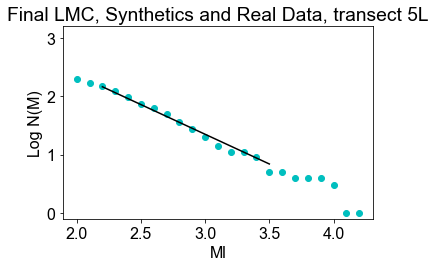

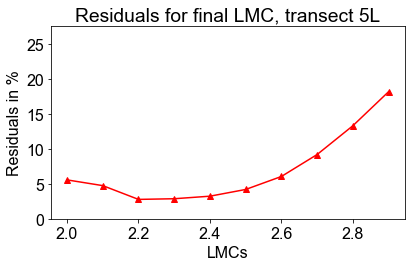

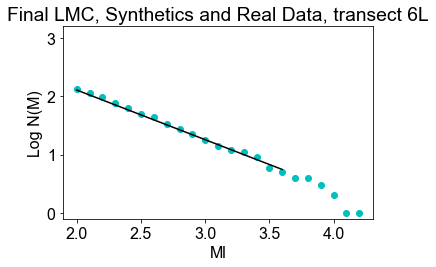

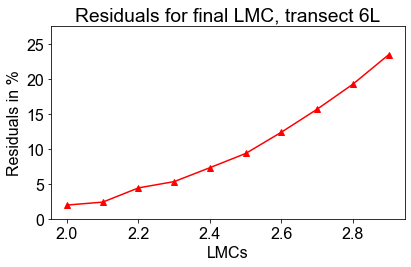

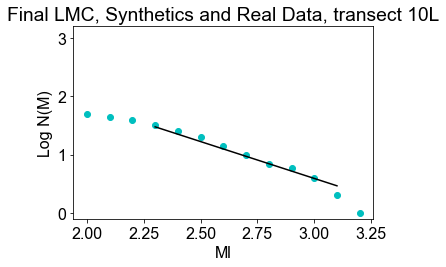

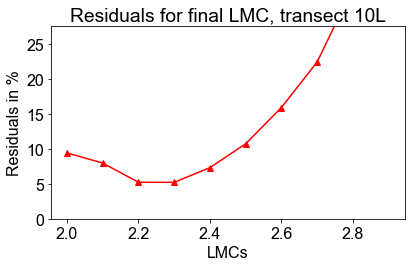

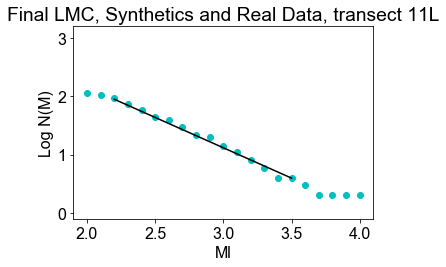

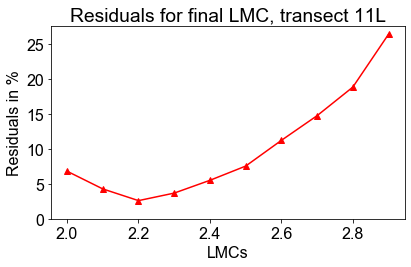

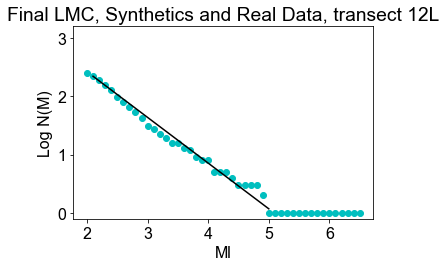

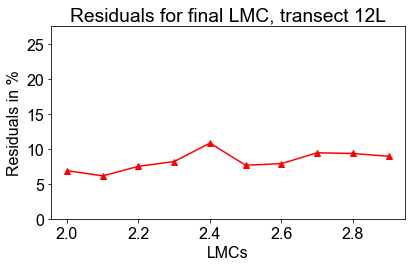

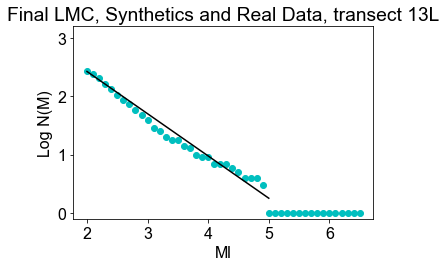

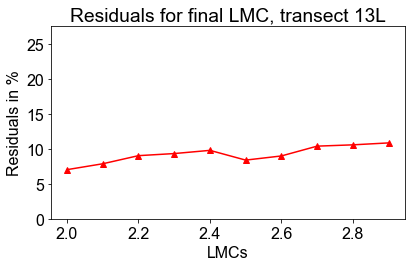

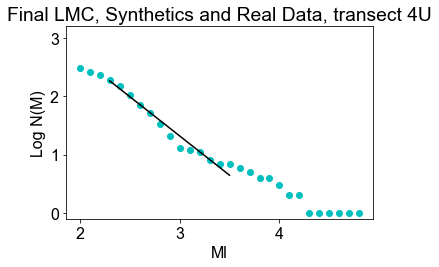

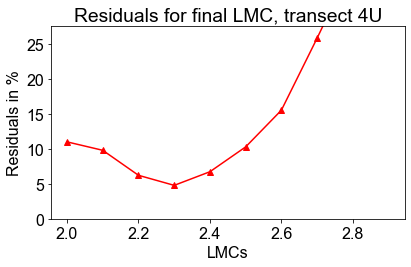

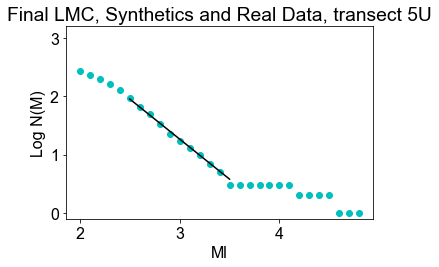

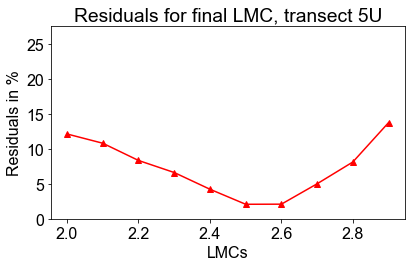

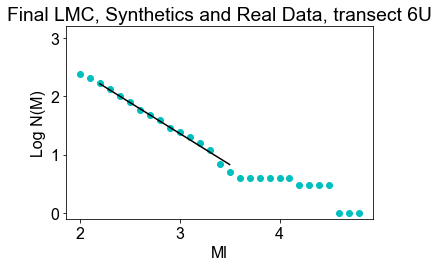

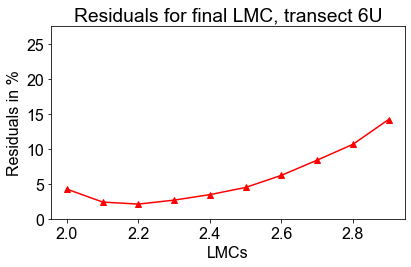

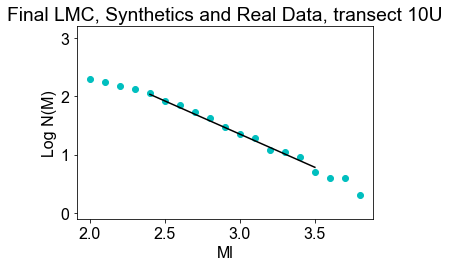

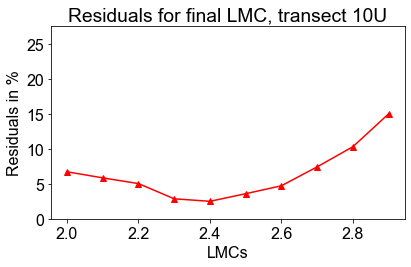

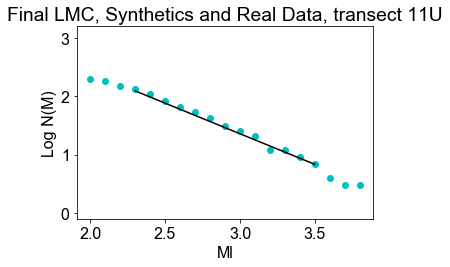

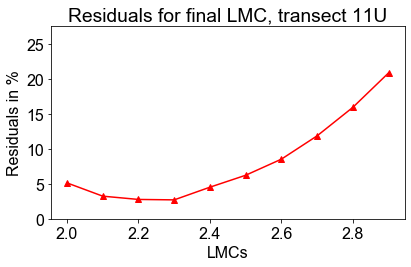

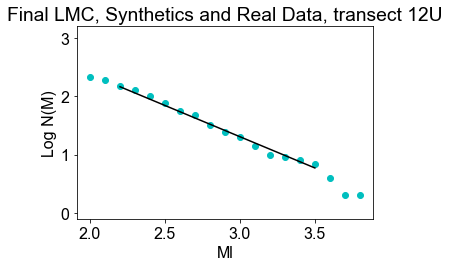

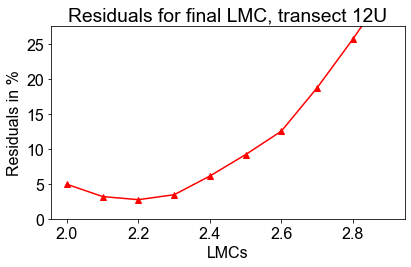

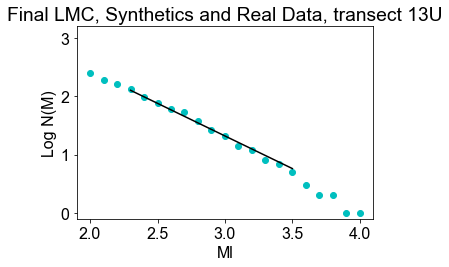

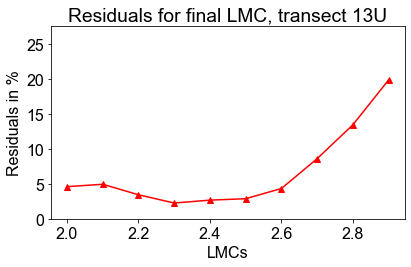

In [8]:
final_lower_cutoff_magnitude=[]
for i in range(len(file)):
    transect=transect_number[i]
    start=start_years[i]
    UMC=umc[i]
    
    d,depth,m,ml,years=[],[],[],[],[]
    evtfl=open(file[i])

    #fill the empty lists with data from the associated file
    for line in evtfl:
        d.append(line.split()[2])
        m.append(line.split()[3])
        years.append(line.split()[5])
        
    years=[float(i) for i in years]
    
    #keep only the data that is from after the start point given in the list above
    for i in range(len(years)):
        if years[i]<start:
            continue
        else:
            depth.append(d[i])
            ml.append(m[i])
     
    #change data type from strings to floating point numbers
    depth=[float(i) for i in depth]
    ml=[float(i) for i in ml]
    
    ml=[ml[i] for i in range(len(depth)) if depth[i] >= 50]
    depth=[depth[i] for i in range(len(depth)) if depth[i] >= 50]
    
    amt.append(len(depth))
    
    ####################
    
    min_mag=np.arange(2.0,3.0,0.1)
    #min_mag=np.ndarray.tolist(min_mag)
    
    binwidth=0.1
    Nbins=np.arange(2.0,max(ml)+binwidth,binwidth)
    hist,bin_edges=np.histogram(ml,bins=Nbins)
    
    bin_edges=bin_edges[:-1]
    
    cum_y=[sum(hist[i:]) for i in range(len(hist))]
    y=np.log10(cum_y)
    
    #################### HERE COMES THE GOOD STUFF
    
    aval,b,bval,synthetics,real,bins_ = [],[],[],[],[],[]
                      
    cutoffs=[]
    residuals=[]
    r_bins=[]
    
    for j in range(len(min_mag)):
        ml_cut=[]
        #print(UMC)
        syn_ml=[]
        x=min_mag[j]
        while x<= UMC+0.05:
            syn_ml.append(x)
            x+=0.1

        syn_ml=[round(syn_ml[i],1) for i in range(len(syn_ml))]
        syn_ml=np.asarray(syn_ml)
        
        if UMC> max(bin_edges):
            break
            
        for i in range(len(ml)):
            if ml[i]>= min_mag[j] and ml[i]<=UMC:
                ml_cut.append(ml[i])
                
        mu= sum(ml_cut)/len(ml_cut) #sample average
        delta_m=0.1                 #magnitude interval
        
        p=1+(delta_m/(mu-min_mag[j]))
        b=(1/(math.log(10)*delta_m))*math.log(p)
        
        bval.append(b)
        
        a= np.log10(len(ml_cut))+b*min_mag[j]
        aval.append(a)
        
        
        #now deal with the synthetic data
        
        syn_data=b*-1*syn_ml+a
        synthetics.append(syn_data)
        
        B,bins=[],[]
        for i in range(len(bin_edges)):
            if bin_edges[i] >= min_mag[j] and bin_edges[i]<= UMC+0.05:
                B.append(y[i])
                bins.append(round(bin_edges[i],1))
                
        bins_.append(bins)
        real.append(B)
        
        R=[]
        
        
        #print(syn_ml)
        
        r=abs(B-syn_data)
        R.append(r)
        resid=((sum(R)/sum(B))*100)
        residuals.append(sum(resid))
        
    residuals_bins=np.arange(2.0,3.0,0.1)
    
    
    for i in range (len(residuals)):
        if residuals [i] == min(residuals):
            final_lower_cutoff_magnitude.append(min_mag[i])
            plt.figure()
            plt.plot(bin_edges,y,'co')
            plt.plot(bins_[i],synthetics[i],'k')
            plt.title('Final LMC, Synthetics and Real Data, transect '+str(transect))
            plt.xlabel('Ml')
            plt.ylabel('Log N(M)')
            plt.ylim(-0.1,3.2)
            plt.tight_layout()
            plt.savefig('final_LMC_synthetics_transect'+str(transect)+'_50.jpg')
            plt.savefig('final_LMC_synthetics_transect'+str(transect)+'_50.pdf')
            
            plt.figure()
            plt.plot(residuals_bins,residuals,'r^')
            plt.plot(residuals_bins,residuals, 'r-')
            plt.title('Residuals for final LMC, transect '+str(transect))
            plt.xlabel('LMCs')
            plt.ylabel('Residuals in %')
            plt.ylim(0,27.5)
            plt.tight_layout()
            plt.savefig('final_LMC_residuals_transect'+str(transect)+'_50.jpg')
            plt.savefig('final_LMC_residuals_transect'+str(transect)+'_50.pdf')

In [9]:
print(final_lower_cutoff_magnitude)
len(final_lower_cutoff_magnitude)

[2.4000000000000004, 2.2, 2.0, 2.3000000000000003, 2.2, 2.1, 2.0, 2.3000000000000003, 2.5000000000000004, 2.2, 2.4000000000000004, 2.3000000000000003, 2.2, 2.3000000000000003]


14

## Now calculcate b_values

[1.286666091275431, 1.0185056079091985, 0.8506298934865898, 1.2640347486657346, 1.0398038382506094, 0.7837726093019227, 0.7245070869672826, 1.3479018754232794, 1.3746882111183156, 1.0645533091428692, 1.1366564080942516, 1.0501583843994307, 1.0710595947328407, 1.1188240019040259]


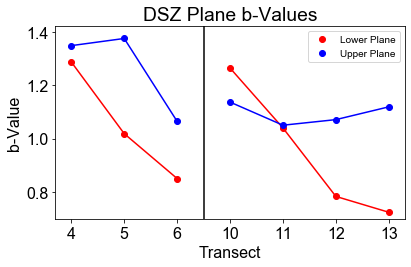

In [10]:
aval,b,bval,error=[],[],[],[]
for i in range(len(file)):
    
    mc=final_lower_cutoff_magnitude[i]
    m_max=umc[i]
    
    start=start_years[i]
    #open file and create empty lists for the info that is needed
    d,depth,m,ml,years=[],[],[],[],[]
    evtfl=open(file[i])

    #fill the empty lists with data from the associated file
    for line in evtfl:
        d.append(line.split()[2])
        m.append(line.split()[3])
        years.append(line.split()[5])
        
    years=[float(i) for i in years]
    
    #keep only the data that is from after the start point given in the list above
    for i in range(len(years)):
        if years[i]<start:
            continue
        else:
            depth.append(d[i])
            ml.append(m[i])
     
    #change data type from strings to floating point numbers
    depth=[float(i) for i in depth]
    ml=[float(i) for i in ml]
    
    #set up a list of values for possible minimum magnitudes
    #we will carry out linear regression on each of these in order to get estimates for what should be the 
    #actual magnitude of completeness
    max_mag=np.arange(3.5,6.6,0.1)
    #keep only the data that is deeper than 50 km
    ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
    depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]

    amt.append(len(depth))
    
    #set up bins for histogram sorting *note that Weimer and Wyss use cumulative magnitude for their methods
    binwidth=0.1
    Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
    #create histogram from real data
    hist,bin_edges=np.histogram(ml,bins=Nbins)
    bin_edges=bin_edges[:-1]
    #make into a cumulative histogram
    cum_y=[sum(hist[i:]) for i in range(len(hist))]
    #take the log10 of this distribution
    y=np.log10(cum_y)
    
    #now here comes the tricky part, we need to trucate for each minimum magnitude but leaving the high magnitude
    # in tact and then calculate the linear regression coefficients and store them
    
    ml_cut=[]
    for j in range (len(ml)):
        if ml[j]>=mc and ml[j]<= m_max:
            ml_cut.append(ml[j])
                
        ################################################################################
        ######################## MAXIMUM LIKELIHOOD ####################################
        ################################################################################
        # ycut= y values for log10(cum_y)
        # bin_edgescut= bin values
        
    average=sum(ml_cut)/len(ml_cut) 
    m=0.1
    
    p=1+(m/(average-mc))
    b_=(1/(math.log(10)*m))*math.log(p)
    bval.append(b_)

    a = np.log10(len(ml_cut)) + b_* mc
    aval.append(a)

print(bval)

plt.figure()
t=[1,2,3,4,5,6,7]
plt.plot(t[0:7],bval[0:7], 'ro', label='Lower Plane')
plt.plot(t[0:3],bval[0:3], 'r-')
plt.plot(t[3:7],bval[3:7], 'r-')
plt.plot(t,bval[7:14], 'bo', label='Upper Plane')
plt.plot(t[0:3],bval[7:10], 'b-')
plt.plot(t[3:7],bval[10:14], 'b')
plt.plot([3.5,3.5],[0,2],'k')
plt.ylim(0.70,1.42)
plt.legend(loc='best',prop={'size': 10})
plt.xticks(t,['4','5','6','10','11','12','13'])
plt.title('DSZ Plane b-Values')
plt.xlabel('Transect')
plt.ylabel('b-Value')
plt.tight_layout()
plt.savefig('b-Value_planes_50.jpg')
plt.savefig('b-Value_planes_50.pdf')

# plt.plot(transect_number, upper_cutoff_magnitude)
# plt.xticks([1,3,5,7,9,11,13,15,17],['1','3','5','7','9','11','13','15','17'])
# plt.xlabel('Transect Number')
# plt.ylabel('Cutoffs')
# #plt.title('Magnitude Cutoffs for Each Transect')
# #plt.savefig('cutoffs_50.jpg')
# #plt.savefig('cutoffs_50.pdf')




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log10


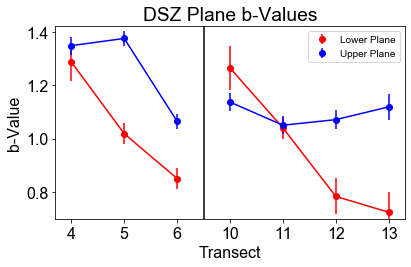

In [11]:
amt=[]
error=[]

for i in range(len(file)):
    low_mag=lower_cutoff_magnitude[i]
    high_mag=umc[i]
    start=start_years[i]
    #open file and create empty lists for the info that is needed
    d,depth,m,ml,years=[],[],[],[],[]
    evtfl=open(file[i])

    #fill the empty lists with data from the associated file
    for line in evtfl:
        d.append(line.split()[2])
        m.append(line.split()[3])
        years.append(line.split()[5])
        
    years=[float(i) for i in years]
    
    #keep only the data that is from after the start point given in the list above
    for i in range(len(years)):
        if years[i]<start:
            continue
        else:
            depth.append(d[i])
            ml.append(m[i])
     
    #change data type from strings to floating point numbers
    depth=[float(i) for i in depth]
    ml=[float(i) for i in ml]
    

    #keep only the data that is deeper than 50 km
    ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
    depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]
    
    depth=[depth[i] for i in range(len(depth)) if ml[i]>=low_mag and ml[i]<= high_mag]
    ml=[ml[i] for i in range(len(ml)) if ml[i]>= low_mag and ml[i] <= high_mag]
    
    

    amt.append(len(depth))

    n=0
    nmax=1000
    boot_b=[]
    while n<nmax:
        index=random.sample(range(len(depth)),round(0.9*len(depth)))

        #use these index numbers to make a list of new magnitude data
        boot_ml=[]
        for i in range(len(index)):
            x=index[i]
            boot_ml.append(ml[x-1])

        binwidth=0.1
        Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
        #create histogram from real data
        hist,bin_edges=np.histogram(ml,bins=Nbins)
        bin_edges=bin_edges[1:]
        #make into a cumulative histogram
        cum_y=[sum(hist[i:]) for i in range(len(hist))]
        #take the log10 of this distribution
        y=np.log10(cum_y)

        #now here comes the tricky part, we need to trucate for each minimum magnitude but leaving the high magnitude
        # in tact and then calculate the linear regression coefficients and store them

        boot_ml_cut=[]
        for j in range (len(boot_ml)):
            if boot_ml[j]>=low_mag and boot_ml[j]<= high_mag:
                boot_ml_cut.append(boot_ml[j])

            ################################################################################
            ######################## MAXIMUM LIKELIHOOD ####################################
            ################################################################################
            # ycut= y values for log10(cum_y)
            # bin_edgescut= bin values

        average=sum(boot_ml_cut)/len(boot_ml_cut) 
        m=0.1

        p=1+(m/(average-low_mag))
        b_=(1/(math.log(10)*m))*math.log(p)

        a = np.log10(len(boot_ml_cut)) + b_* low_mag

        boot_b.append(b_)

        n+=1

    bootstrapped_b=np.mean(boot_b)
    bootstrapped_std=np.std(boot_b)

    error.append(bootstrapped_std*2)




# plt.plot(transect_number, bval, 'r^')
# plt.xticks([1,3,5,7,9,11,13,15,17],['1','3','5','7','9','11','13','15','17'])
# plt.xlabel('Transect Number')
# plt.ylabel('b')
# plt.ylim(0.82,1.42)
# plt.title('b-Values After Bootstrapping '+str(nmax)+' times')
# plt.savefig('b_values_bootstrap_50.jpg')
# plt.savefig('b_values_bootstrap_50.pdf')

plt.figure()
t=[1,2,3,4,5,6,7]
plt.errorbar(t[0:7],bval[0:7], yerr=error[0:7], xerr=None, fmt='ro', label='Lower Plane')
plt.plot(t[0:3],bval[0:3], 'r-')
plt.plot(t[3:7],bval[3:7], 'r-')
plt.errorbar(t,bval[7:14], yerr=error[7:14], xerr=None, fmt='bo', label='Upper Plane')
plt.plot(t[0:3],bval[7:10], 'b-')
plt.plot(t[3:7],bval[10:14], 'b')
plt.plot([3.5,3.5],[0,2],'k')
plt.ylim(0.70,1.42)
plt.legend(loc='best',prop={'size': 10})
plt.xticks(t,['4','5','6','10','11','12','13'])
plt.title('DSZ Plane b-Values')
plt.xlabel('Transect')
plt.ylabel('b-Value')
plt.tight_layout()

plt.savefig('b-Value_planes_bootstrapped_50.jpg')
plt.savefig('b-Value_planes_bootstrapped_50.pdf')

